# The Indiana Training Program in Public and Population Health Informatics
## Exercise 3  - BMI calculation using height and weight
### 3.2 Cleaning, editing, transforming the file 
*Competencies addressed*  
 
 1. Transformation of raw data to formats more suitable for downstream use cases (I.1.2)
 2. Assess data quality (I.1.4)
 3. Acquire skills related to visualize data to discover patterns (II.1.3)

*Learning objectives*  
 At the end of this module the student will be able to do the following:

1. Various data cleaning, editing in R ...
2. Transform the data from long to wide layout ...

### 3.2- Cleaning the subset data, transforming (long to wide) and editing it

In this exercise we will practice on data reshaping methods....

### Let's pick up from where we left off at the end of Exercise 3.1
We will load the "wt_ht" data that we created in our last exercise.

In [1]:
getwd()  #Check the current directory.
setwd("/N/dc2/projects/T15/Sample") #Set the working folder.
list.files()
file.info("wt_ht.RDATA")
load(file = "wt_ht.RDATA")

[1] "/N/dc2/projects/T15/Sample"

[1] "1-Descriptives.R"                 "2.1-Sampling.R"                  
 [3] "2.2-Pertubration.R"               "3-Exercises 1.R"                 
 [5] "3-Exercises 32 Algorithm Check.R" "T-15 Ex 1 RACE.ipynb"            
 [7] "T-15 Ex 2 NDC.ipynb"              "T-15 Ex 3 .1 BMI.ipynb"          
 [9] "T-15 Ex 3.2 BMI.ipynb"            "T-15 Ex 3.3 BMI.ipynb"           
[11] "Untitled.ipynb"                   "Untitled1.ipynb"                 
[13] "clinical_vars.csv"                "diagnosis.csv"                   
[15] "encounters.csv"                   "ht_summary.csv"                  
[17] "medication.csv"                   "patients.csv"                    
[19] "t2d Exercises 1.ipynb"            "unindc.dta"                      
[21] "wt_ht.RDATA"                      "wt_ht_wide.RDATA"

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
wt_ht.RDATA,672195,FALSE,660,2018-10-21 14:13:05,2018-10-21 14:13:05,2018-10-21 01:50:49,498945,1297,ukirbiyi,T15


### Cleaning the wt_ht data
As noted in Ex 3.1, the `fread` function reads the OBS variable as character. We will change the class to "factor".
If R base is used (the usual way) to read the file, the OBS variable is read as "factor" first.*<br>

`*`If class query returns "factor", we will need to transform the OBS variable to character and back to factor again to remove the hidden levels of the OBS variable. The following code does that: <br>
`wt_ht$OBS <- as.factor(as.character(wt_ht$OBS))`

In [2]:
class(wt_ht$OBS)
wt_ht$OBS <- as.factor(wt_ht$OBS)
as.data.frame(table(wt_ht$OBS))

[1] "character"

Var1,Freq
BMI,9217
Height Metric,15897
Height(In),35938
Weight Lbs,81715
Weight Metric,43833


### Removing and reordering  columns
When we explore our dataset, we see there is no valuable information in the columns TYPE, CODED_CODE, and CODE_NAME. We remove these columns and reorder the left ones to keep our data tidy.<br>

We will remove and reorder the columns using dplyr's `select` function. This also can be done with base R. <br>
We will first call the tidyverse package. 

In [3]:
library (tidyverse) #dplyr is a part of the tidyverse package.

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 3.0.0     <U+221A> purrr   0.2.5
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.6
<U+221A> tidyr   0.8.1     <U+221A> stringr 1.3.1
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [4]:
head(wt_ht)
wt_ht <- select(wt_ht, STUDYID, DAYS_VIS_INDEX, OBS, OBSVALUE) 
#wt_ht <- wt_ht[,c(1,7,2,4)]  #Use this code instead if you are using base R.
head(wt_ht)

STUDYID,OBS,OBSVALUE,DAYS_VIS_INDEX
16,Weight Lbs,144,-392
16,Weight Lbs,148,-382
16,Weight Lbs,145,-266
16,Weight Lbs,152,-245
16,Weight Lbs,144,-200
16,Weight Lbs,145,-154


STUDYID,DAYS_VIS_INDEX,OBS,OBSVALUE
16,-392,Weight Lbs,144
16,-382,Weight Lbs,148
16,-266,Weight Lbs,145
16,-245,Weight Lbs,152
16,-200,Weight Lbs,144
16,-154,Weight Lbs,145


### Sorting column values (from low to high/A to Z)
We will sort the columns starting with STUDYID, then following with DAYS_VIS_INDEX, OBS, and OBSVALUE. <br>
This would not only tidy the data but would be necessary for running the loop to find the same observations with different values for a patient. 

In [5]:
wt_ht <- wt_ht[order(wt_ht$STUDYID, wt_ht$DAYS_VIS_INDEX, wt_ht$OBS, wt_ht$OBSVALUE),]
head(wt_ht)

STUDYID,DAYS_VIS_INDEX,OBS,OBSVALUE
16,-392,Weight Lbs,144
16,-382,Weight Lbs,148
16,-266,Weight Lbs,145
16,-245,Weight Lbs,152
16,-200,Weight Lbs,144
16,-154,Weight Lbs,145


### Removing repeat-rows (rows with same values in each field)
These observations have the same day, same observation with the same value for the same patient. The `unique` function collapses these observations into one (row). <br>
Here we are also changing the name of the data to `wt_ht_uniq`. Changing the name of the processed data at milestones, in case of an error, saves time by not having to start our code from the beginning.  

In [6]:
nrow(wt_ht) #Provides the current row count.
wt_ht_uniq <- unique(wt_ht) #Unique function collapses the rows with the same value into one row. 
nrow(wt_ht)- nrow(wt_ht_uniq)  #Provides the count of repeat rows removed.

[1] 186600

[1] 20554

### Checking for observations of the same day with different measurement values (for the same patient)
The code below checks wether the row matches the row under it (except the OBSVALUE field),
ie, starting with the STUDYID, DAYS_VIS_INDEX and OBS fields are checked for match. 
The loop goes through rows one by one (column values were sorted beforehand).
* The 3 conditions are checked in the order above. 
* If the condition does match, the condition goes to the next condition.
* If the condition does NOT match, the loop goes to next row.
* When all the 3 conditions match ,"err" variable is assigned "1" and the value difference "diff" (difference between the OBSVALUE fields of the two rows) is noted. 


In [7]:
#Let's create new variables for error tracking.
wt_ht_uniq$err <- 0
wt_ht_uniq$diff <- NA

for (i in 1:(length(wt_ht_uniq$STUDYID)-1)) {
  if(wt_ht_uniq[i,1] != wt_ht_uniq[i+1,1]) next #Loop at STUDYID level.
    else { if(wt_ht_uniq[i,2] != wt_ht_uniq[i+1,2]) next #Loop at DAYS_VIS_INDEX level.
     else { if(wt_ht_uniq[i,3] != wt_ht_uniq[i+1,3]) next #Loop at OBS level.
       else {
         wt_ht_uniq$err[i] <-1
         wt_ht_uniq$err[i+1] <-1
         wt_ht_uniq$diff[i] <-  wt_ht_uniq[i+1,4] - wt_ht_uniq[i,4]
         wt_ht_uniq$diff[i+1] <-  wt_ht_uniq[i,4] - wt_ht_uniq[i+1,4]
         }
     }
    }
}

head(wt_ht_uniq, n=10)

STUDYID,DAYS_VIS_INDEX,OBS,OBSVALUE,err,diff
16,-392,Weight Lbs,144,0,NA
16,-382,Weight Lbs,148,0,NA
16,-266,Weight Lbs,145,0,NA
16,-245,Weight Lbs,152,0,NA
16,-200,Weight Lbs,144,0,NA
16,-154,Weight Lbs,145,0,NA
16,-119,Weight Lbs,148,0,NA
16,-21,Weight Lbs,132,0,NA
16,-18,Weight Lbs,133,0,NA
16,4,Weight Lbs,138,0,NA


### Number of conflicting observation values for the same day for same patient

In [8]:
#Returns 13429 rows (OBS that have the same visit date).
sum(wt_ht_uniq$err)

[1] 13429

### Deleting errors
Because the number of errors is low, we simply choose to delete these rows with conflicting values. However, it is possible to use the "diff" variable created to evaluate and decide to keep a number of rows with smaller observation value difference. 

In [9]:
#Using dplyr and piping
wt_ht_uniq <- wt_ht_uniq %>% filter(err == 0)
#Use this code instead if you are using base R
#wt_ht_uniq <- wt_ht_uniq[wt_ht_uniq$err == 0,]

### Transforming the data set from long to wide format 
Here is how the transformations works: 
* Name of column containing the new column names is OBS. This creates the "Weight Lbs", "Weight Metric", "Height(In)", "Height Metric" and "BMI" columns
* Name of column containing values (for these columns) is OBSVALUE. The values are moved to their corresponding columns.
* If there is more than one observation for the same day, the values are recorded in the same row. Note that we have removed all the same observations of the same day for each patient. 

In [10]:
#Let's commpare the first 6 rows (using `head` function)  to see how the data structure has changed. 
head(wt_ht_uniq)
wt_ht_wide <- spread(wt_ht_uniq, OBS, OBSVALUE)
head(wt_ht_wide)

STUDYID,DAYS_VIS_INDEX,OBS,OBSVALUE,err,diff
16,-392,Weight Lbs,144,0,NA
16,-382,Weight Lbs,148,0,NA
16,-266,Weight Lbs,145,0,NA
16,-245,Weight Lbs,152,0,NA
16,-200,Weight Lbs,144,0,NA
16,-154,Weight Lbs,145,0,NA


STUDYID,DAYS_VIS_INDEX,err,diff,BMI,Height Metric,Height(In),Weight Lbs,Weight Metric
16,-392,0,NA,NA,NA,NA,144,NA
16,-382,0,NA,NA,NA,NA,148,NA
16,-266,0,NA,NA,NA,NA,145,NA
16,-245,0,NA,NA,NA,NA,152,NA
16,-200,0,NA,NA,NA,NA,144,NA
16,-154,0,NA,NA,NA,NA,145,NA


### Delete err and diff columns 
At this point we do not have a use for these columns, so we remove them. 
It is good practice to change the file name as we do major modifications on the data. This not only provides us a backup in case of possible errors made to the data as we progress but also to go back and query a question we have later on. 

In [11]:
wt_ht_wide <- wt_ht_wide[, -c(3,4)] #Run once.
head(wt_ht_wide)
length(unique(wt_ht_wide$STUDYID)) # Number of unique patients. 

STUDYID,DAYS_VIS_INDEX,BMI,Height Metric,Height(In),Weight Lbs,Weight Metric
16,-392,NA,NA,NA,144,NA
16,-382,NA,NA,NA,148,NA
16,-266,NA,NA,NA,145,NA
16,-245,NA,NA,NA,152,NA
16,-200,NA,NA,NA,144,NA
16,-154,NA,NA,NA,145,NA


[1] 9420

### Removing extreme values
In all large health data sets, extreme values are quite common and values should be checked for these kinds of abberations. We use simple histograms for our variables to see the distribution of the observation values.  

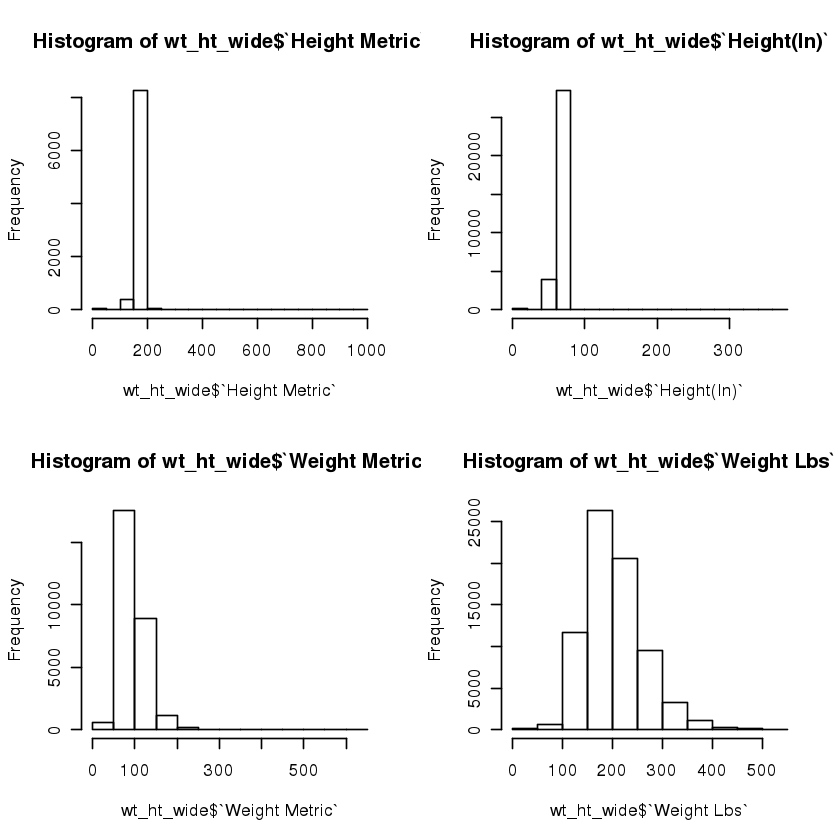

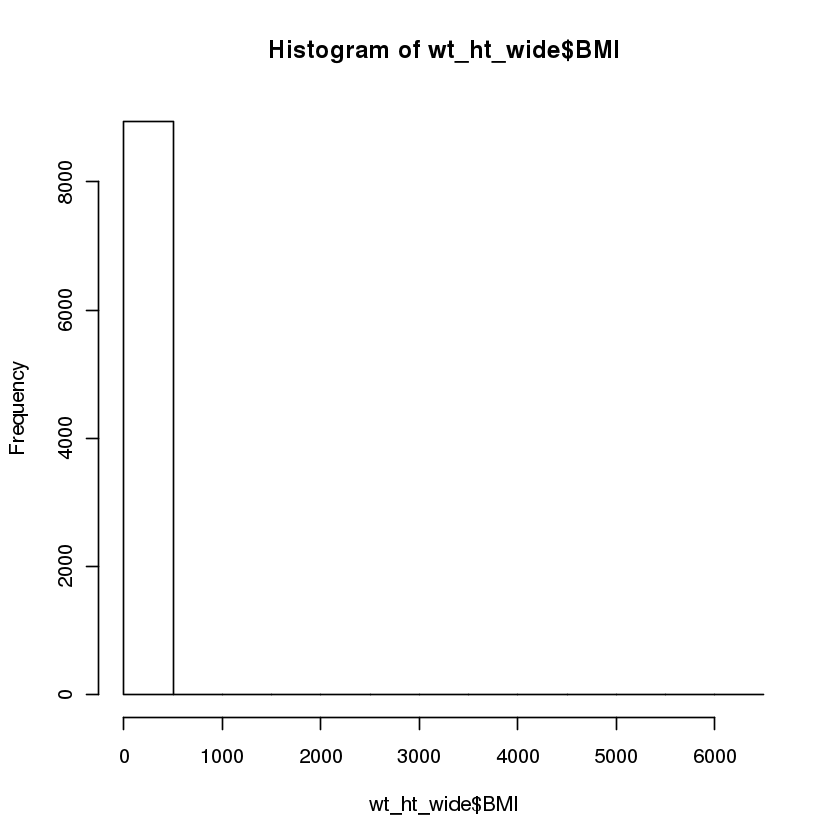

In [12]:
par(mfrow=c(2,2)) #Prints 4 figures in one page.
hist(wt_ht_wide$`Height Metric`)
hist(wt_ht_wide$`Height(In)`)
hist(wt_ht_wide$`Weight Metric`)
hist(wt_ht_wide$`Weight Lbs`)
par(mfrow=c(1,1))
hist(wt_ht_wide$BMI)


### Removing observation values beyond our pre-selected range
Let's limit the range of variables since these extreme values are not likely to be true. We will be using the following ranges (imperial values are converted to metric system):
- For `height`, 140 to 210cm
- For `weight`, 50 to 250kg
- For `BMI`, 15-100 kg/m^2

These values are choosen loosely. A wider or narrower range can be used based on the research question. We used the `ifelse` function to replace values beyond our range with NA (empty field). 

In [13]:
#Height range is 140 to 210cm.
wt_ht_wide$`Height Metric`<- ifelse((wt_ht_wide$`Height Metric`>210)|
                                    (wt_ht_wide$`Height Metric`< 140),
                                    NA, wt_ht_wide$`Height Metric`)
wt_ht_wide$`Height(In)`<- ifelse((wt_ht_wide$`Height(In)`>210/2.54)|
                                 (wt_ht_wide$`Height(In)`< 140/2.54),
                                    NA, wt_ht_wide$`Height(In)`)
#Weight range is 50 to 250kg. 
wt_ht_wide$`Weight Metric`<- ifelse((wt_ht_wide$`Weight Metric`>250)|
                                    (wt_ht_wide$`Weight Metric`< 50),
                                    NA, wt_ht_wide$`Weight Metric`)
wt_ht_wide$`Weight Lbs`<- ifelse((wt_ht_wide$`Weight Lbs`> (250/.4536)|
                                  (wt_ht_wide$`Weight Lbs`< (50/.4536))),
                                 NA, wt_ht_wide$`Weight Lbs`)

#BMI range is 15 to 100 kg/m2.
wt_ht_wide$BMI<- ifelse((wt_ht_wide$BMI>100)|(wt_ht_wide$BMI< 15),
                                    NA, wt_ht_wide$BMI)


Let's see the disribution (histogram) of the 5 observations after the filtering. We can also use the `summary` function for each variable. 

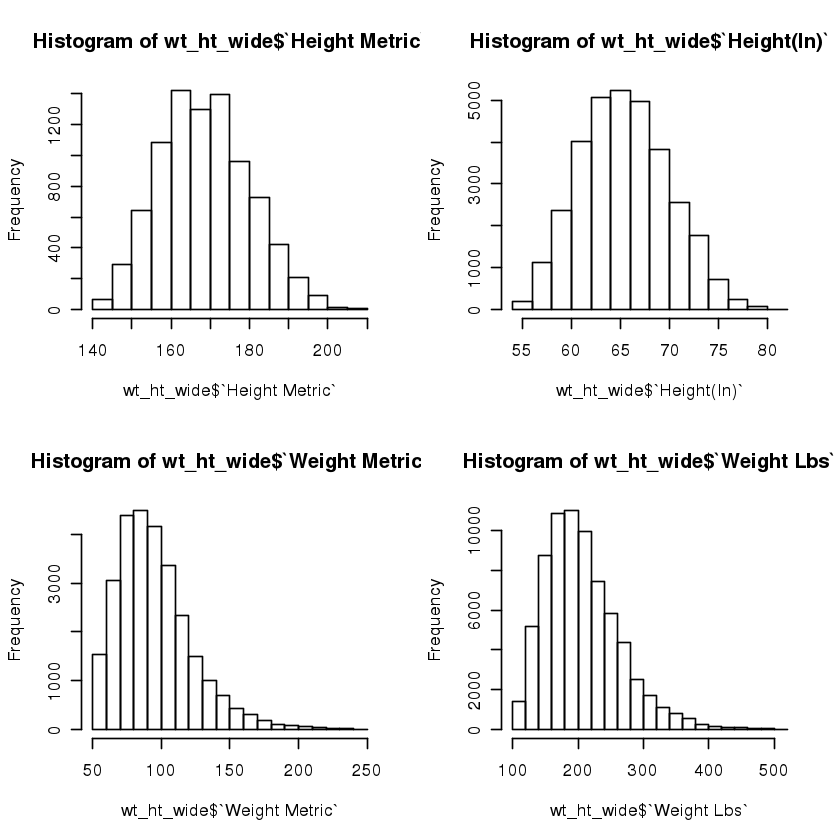

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  140.0   160.1   170.0   169.2   177.4   207.0   79205 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  55.53   63.00   66.00   65.94   69.00   82.00   55629 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  50.00   75.60   91.10   95.69  110.00  249.00   60019 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  110.3   166.0   198.0   207.3   239.0   520.0   15629 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  15.00   28.35   33.21   34.77   39.99   94.69   78966 

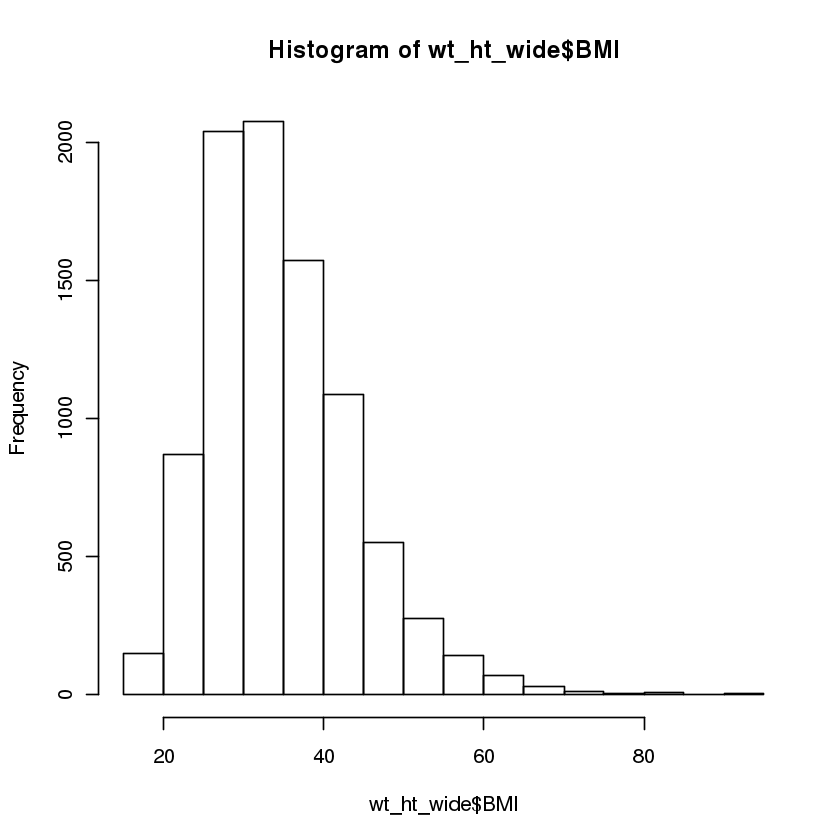

In [14]:
par(mfrow=c(2,2)) #Prints 4 figures in one page.
hist(wt_ht_wide$`Height Metric`)
hist(wt_ht_wide$`Height(In)`)
hist(wt_ht_wide$`Weight Metric`)
hist(wt_ht_wide$`Weight Lbs`)
par(mfrow=c(1,1))
hist(wt_ht_wide$BMI)

summary(wt_ht_wide$`Height Metric`)
summary(wt_ht_wide$`Height(In)`)
summary(wt_ht_wide$`Weight Metric`)
summary(wt_ht_wide$`Weight Lbs`)
summary(wt_ht_wide$BMI)

### Saving the data in RDATA format
To load the file, we use the following code: <br>
load(file = "wt_ht_wide.RDATA")

In [15]:
save(wt_ht_wide, file ="wt_ht_wide.RDATA")
file.info("wt_ht_wide.RDATA")

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
wt_ht_wide.RDATA,567537,FALSE,660,2018-10-21 14:14:55,2018-10-21 14:14:55,2018-10-19 11:49:28,498945,1297,ukirbiyi,T15


== END of EX 3.2 ==